In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import os
import random

In [3]:
classname = {'buildings':0, 'forest': 1, 'glacier':2, 'mountain': 3, 'sea': 4, 'street': 5}

In [36]:
path = 'seg_train'
label = np.array([])
file_names = []
for i in list(classname.keys()):
    tmp = os.listdir(f'{path}/{i}/')
    for _ in range(500):
        file_names.append(f'{path}/{i}/{random.choice(tmp)}')
        label = np.append(label, classname[i])

img = np.array(Image.open(file_names[0]).convert('L'))
dataset = img.flatten()

for i in range(1, len(file_names)):
    img = np.array(Image.open(file_names[i]).convert('L'))
    dataset = np.vstack((dataset, img.flatten()))

In [27]:
dataset = np.hstack((dataset, label.reshape(-1,1)))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(dataset,label,test_size=0.2)

In [51]:
clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train) 

SGDClassifier(random_state=42)

In [52]:
y_est = clf.predict(X_test)

In [53]:
accuracy_score(y_pred=y_est,y_true=y_test)

0.5016666666666667

Text(0.5, 15.0, 'Predicted')

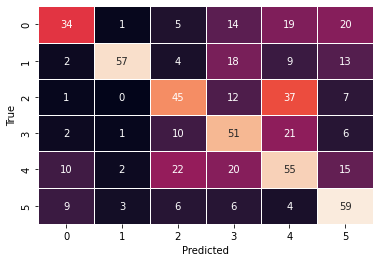

In [50]:
cfm = confusion_matrix(y_test, y_est)
sns.heatmap(cfm, annot=True,  linewidths=.5, cbar=None)
plt.ylabel('True')
plt.xlabel('Predicted')